In [ ]:
import numpy as np
import pandas as pd
# import pymysql
# import configparser
# from decimal import Decimal
# import datetime
# import chardet

# 连接数据库

In [12]:
def getConn():
    config = configparser.ConfigParser()
    config.read('config.ini', encoding='utf8')
    db_url = config['base_config']['host']
    db_port = config['base_config']['port']
    db_username = config['base_config']['username']
    db_password = config['base_config']['password']
    db_name = config['base_config']['basename']
    return pymysql.connect(host=db_url,
                           port=int(db_port),
                           user=db_username,
                           password=db_password,
                           db=db_name,
                           charset='utf8mb4')

In [13]:
conn = getConn()

# 读取csv

In [9]:
data = pd.read_csv("defillama_raises.csv", encoding='utf-8', encoding_errors='ignore')  # 忽略无法解码的字符

In [10]:
data = data[["Date","Amount_Raised","Round"]]

In [15]:
# 查看融资轮次
financing_rounds = set(data["Round"])
len(financing_rounds)

88

In [16]:
# 查看出现频率较高的轮次
data["Round"].value_counts()[:10]

Round
Seed               2144
Series A            834
ICO                 417
Pre-Seed            377
Series B            239
Strategic           230
Private             164
Post-IPO Equity      97
Angel Round          81
Series C             68
Name: count, dtype: int64

# 季度数据

In [13]:
def getRoundData(data,Round_name, Amount_name):
    Round_data = pd.DataFrame()
    for name in Round_name:
        tmp_data = data[data["Round"]==name]
        Round_data = pd.concat([Round_data,tmp_data], axis=0)
    Round_data.drop_duplicates(inplace=True)
    Round_data.reset_index(inplace=True, drop=True)
    Round_data['Date'] = pd.to_datetime(Round_data['Date'])
    Round_data['quarter'] = Round_data['Date'].dt.to_period('Q')
    Round_data = Round_data[["quarter","Amount_Raised"]].groupby("quarter").median().reset_index()
    Round_data.rename(columns={"Amount_Raised": Amount_name}, inplace=True)
    return Round_data

In [14]:
# Pre Seed Round
Pre_Seed_Round_name = [
    'Pre-Seed',
    'Preseed',
    'Pre-seed+',
]
Pre_Seed_Round = getRoundData(data, Pre_Seed_Round_name, "Pre_Seed_Round")
Pre_Seed_Round

,quarter,Pre_Seed_Round
0,2014Q4,366000.0
1,2015Q1,273000.0
2,2015Q2,250000.0
3,2015Q4,493000.0
4,2016Q1,750000.0
5,2016Q2,250000.0
6,2016Q3,250000.0
7,2017Q1,1000000.0
8,2017Q2,1000000.0
9,2017Q3,1000000.0


In [15]:
# Seed
Seed_Round_name = [
    'Pre-Seed & Seed',
    'Seed',
    'Seed+',
]
Seed_Round = getRoundData(data, Seed_Round_name, "Seed_Round")
Seed_Round

,quarter,Seed_Round
0,2014Q2,1186000.0
1,2014Q3,900500.0
2,2014Q4,1252500.0
3,2015Q1,949000.0
4,2015Q2,1200000.0
5,2015Q3,1191000.0
6,2015Q4,1000000.0
7,2016Q1,1125000.0
8,2016Q2,1000000.0
9,2016Q3,1300000.0


In [16]:
# 天使轮相关   'Pre-Seed, Seed & Community Round', 社区轮次
Angel_Round_name = ['Angel Round',
'Angel & Pre-Seed',
'Angel & Seed',
]
Angel_Round = getRoundData(data, Angel_Round_name, "Angel_Round")
Angel_Round

,quarter,Angel_Round
0,2014Q3,1300000.0
1,2014Q4,2667500.0
2,2015Q1,1250000.0
3,2015Q4,784000.0
4,2016Q1,1000000.0
5,2016Q2,519000.0
6,2016Q3,500000.0
7,2016Q4,1468000.0
8,2017Q1,1710000.0
9,2017Q2,3041000.0


In [17]:
# Pre A
Pre_A_name = [round for round in financing_rounds if ("pre" in str(round)) and ("A" in str(round)) and ("Series" in str(round))]
Pre_A_name

['Series pre-A', 'pre-Series A', 'pre-Series A ']

In [18]:
Pre_A_Round = getRoundData(data, Pre_A_name, "Pre_A_Round")
Pre_A_Round

,quarter,Pre_A_Round
0,2022Q2,5800000.0
1,2022Q3,9500000.0
2,2023Q1,4000000.0
3,2023Q2,16500000.0
4,2023Q3,3000000.0
5,2023Q4,2000000.0
6,2024Q1,11000000.0
7,2024Q2,6000000.0
8,2024Q3,9500000.0
9,2025Q1,10000000.0


In [19]:
# A
A_name = [round for round in financing_rounds if ("pre" not in str(round)) and ("A" in str(round)) 
          and ("Series" in str(round)) and ("B" not in str(round))]
A_name

['Series A1',
 'Series A',
 'Seed and Series A',
 'Series A+',
 'Series A2',
 'Series A-4']

In [20]:
A_Round = getRoundData(data, A_name, "A_Round")
A_Round

,quarter,A_Round
0,2014Q2,12000000.0
1,2014Q3,8500000.0
2,2014Q4,6100000.0
3,2015Q1,2500000.0
4,2015Q2,5000000.0
5,2015Q3,3500000.0
6,2015Q4,2950000.0
7,2016Q1,3000000.0
8,2016Q2,4500000.0
9,2016Q3,2500000.0


In [21]:
# Pre B
Pre_B_name = [round for round in financing_rounds if ("pre" in str(round)) and ("B" in str(round)) and ("Series" in str(round))]
Pre_B_name

['pre-Series B']

In [22]:
Pre_B_Round = getRoundData(data, Pre_B_name, "Pre_B_Round")
Pre_B_Round

,quarter,Pre_B_Round
0,2022Q2,150000000.0


In [24]:
# B
B_name = [round for round in financing_rounds if ("pre" not in str(round)) and ("B" in str(round)) 
          and ("Series" in str(round)) and ("C" not in str(round))]
B_name

['Series B2', 'Series B-1', 'Series A & B', 'Series B', 'Series B1']

In [25]:
B_Round = getRoundData(data, B_name, "B_Round")
B_Round

,quarter,B_Round
0,2014Q3,9500000.0
1,2014Q4,10806500.0
2,2015Q1,5000000.0
3,2015Q3,4100000.0
4,2015Q4,4622500.0
5,2016Q1,6080000.0
6,2016Q2,16663000.0
7,2016Q3,22000000.0
8,2016Q4,4000000.0
9,2017Q1,10600000.0


In [26]:
# Pre C
Pre_C_name = [round for round in financing_rounds if ("pre" in str(round)) and ("C" in str(round)) and ("Series" in str(round))]
Pre_C_name

[]

In [27]:
# C
C_name = [round for round in financing_rounds if ("pre" not in str(round)) and ("C" in str(round)) 
          and ("Series" in str(round)) and ("D" not in str(round))]
C_name

['Series C-1', 'Series C+', 'Series C']

In [28]:
C_Round = getRoundData(data, C_name, "C_Round")
C_Round

,quarter,C_Round
0,2015Q1,75000000.0
1,2015Q2,50000000.0
2,2015Q3,25000000.0
3,2016Q2,26945000.0
4,2016Q3,10500000.0
5,2017Q4,8315000.0
6,2018Q1,71000000.0
7,2018Q3,28445000.0
8,2019Q1,75300000.0
9,2019Q2,20000000.0


In [29]:
# IPO or ICO
IPO_name = [round for round in financing_rounds if (("pre" not in str(round)) and ("IPO" in str(round))) or (("pre" not in str(round)) and ("ICO" in str(round))) ]
IPO_name

['Post-IPO Debt', 'Post-IPO Equity', 'IPO', 'ICO']

In [30]:
IPO_Round = getRoundData(data, IPO_name, "IPO_Round")
IPO_Round

,quarter,IPO_Round
0,2014Q3,9431000.0
1,2015Q4,5300000.0
2,2016Q1,5500000.0
3,2016Q2,83967500.0
4,2016Q3,3778000.0
5,2016Q4,10868000.0
6,2017Q1,5200000.0
7,2017Q2,17878000.0
8,2017Q3,20000000.0
9,2017Q4,10000000.0


In [31]:
# 合并 Pre_Seed_Round Seed_Round Angel_Round A_Round B_Round C_Round IPO_Round

concat_rounds = [Pre_Seed_Round, Angel_Round, A_Round, B_Round, C_Round, IPO_Round]
all_rounds = Seed_Round.copy()
for r in concat_rounds:
    all_rounds = all_rounds.merge(r,on="quarter", how="left")

In [32]:
all_rounds

,quarter,Seed_Round,Pre_Seed_Round,Angel_Round,A_Round,B_Round,C_Round,IPO_Round
0,2014Q2,1186000.0,NaN,NaN,12000000.0,NaN,NaN,NaN
1,2014Q3,900500.0,NaN,1300000.0,8500000.0,9500000.0,NaN,9431000.0
2,2014Q4,1252500.0,366000.0,2667500.0,6100000.0,10806500.0,NaN,NaN
3,2015Q1,949000.0,273000.0,1250000.0,2500000.0,5000000.0,75000000.0,NaN
4,2015Q2,1200000.0,250000.0,NaN,5000000.0,NaN,50000000.0,NaN
5,2015Q3,1191000.0,NaN,NaN,3500000.0,4100000.0,25000000.0,NaN
6,2015Q4,1000000.0,493000.0,784000.0,2950000.0,4622500.0,NaN,5300000.0
7,2016Q1,1125000.0,750000.0,1000000.0,3000000.0,6080000.0,NaN,5500000.0
8,2016Q2,1000000.0,250000.0,519000.0,4500000.0,16663000.0,26945000.0,83967500.0
9,2016Q3,1300000.0,250000.0,500000.0,2500000.0,22000000.0,10500000.0,3778000.0


In [33]:
# 计算 （altcoin + eth）/（altcoin+eth+btc）
marketcap_data = pd.read_csv("marketdata_filled.csv")
marketcap_data.isnull().sum().sum()

0

In [34]:
marketcap_data["(altcoin+eth)/(altcoin+eth+btc)"] = (marketcap_data["altcoin_marketCap"]+marketcap_data["eth_marketCap"]) / \
        (marketcap_data["altcoin_marketCap"]+marketcap_data["eth_marketCap"]+marketcap_data["btc_marketCap"])
marketcap_data.columns


Index(['date_time', 'btc_marketCap', 'btc_marketCap_percentage',
       'eth_marketCap', 'eth_marketCap_percentage', 'stablecoin_marketCap',
       'stablecoin_marketCap_percentage', 'altcoin_marketCap',
       'altcoin_marketCap_percentage', 'total_marketCap', 'btc_price',
       '(altcoin+eth)/(altcoin+eth+btc)'],
      dtype='object')

In [35]:
new_marketcap = marketcap_data[["date_time","(altcoin+eth)/(altcoin+eth+btc)","btc_price"]]
marketcap_data["date_time"] = pd.to_datetime(marketcap_data["date_time"])
new_marketcap["quarter"] = marketcap_data["date_time"].dt.to_period('Q')

C:\Users\PuLin\AppData\Local\Temp\ipykernel_19564\2260495001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_marketcap["quarter"] = marketcap_data["date_time"].dt.to_period('Q')


In [36]:
marketcap_fundingraise = new_marketcap.merge(all_rounds, on="quarter", how="left")
marketcap_fundingraise.isnull().sum()

date_time                             0
(altcoin+eth)/(altcoin+eth+btc)       0
btc_price                             0
quarter                               0
Seed_Round                            0
Pre_Seed_Round                      365
Angel_Round                        1003
A_Round                               0
B_Round                               0
C_Round                             550
IPO_Round                           642
dtype: int64

In [37]:
marketcap_fundingraise.to_csv("marketcap_fundingraise.csv", index=False)

In [38]:
marketcap_fundingraise

,date_time,(altcoin+eth)/(altcoin+eth+btc),btc_price,quarter,Seed_Round,Pre_Seed_Round,Angel_Round,A_Round,B_Round,C_Round,IPO_Round
0,2018-09-11,0.413086,6321.200000,2018Q3,2098000.0,1500000.0,1880000.0,5080000.0,10000000.0,28445000.0,15000000.0
1,2018-09-12,0.410225,6351.800000,2018Q3,2098000.0,1500000.0,1880000.0,5080000.0,10000000.0,28445000.0,15000000.0
2,2018-09-13,0.418942,6517.310000,2018Q3,2098000.0,1500000.0,1880000.0,5080000.0,10000000.0,28445000.0,15000000.0
3,2018-09-14,0.422218,6512.710000,2018Q3,2098000.0,1500000.0,1880000.0,5080000.0,10000000.0,28445000.0,15000000.0
4,2018-09-15,0.426815,6543.200000,2018Q3,2098000.0,1500000.0,1880000.0,5080000.0,10000000.0,28445000.0,15000000.0
...,...,...,...,...,...,...,...,...,...,...,...
2299,2024-12-27,0.427975,95962.588945,2024Q4,4000000.0,2000000.0,NaN,11250000.0,15700000.0,33000000.0,NaN
2300,2024-12-28,0.431042,94421.139968,2024Q4,4000000.0,2000000.0,NaN,11250000.0,15700000.0,33000000.0,NaN
2301,2024-12-29,0.432838,94428.851804,2024Q4,4000000.0,2000000.0,NaN,11250000.0,15700000.0,33000000.0,NaN
2302,2024-12-30,0.434622,94436.563640,2024Q4,4000000.0,2000000.0,NaN,11250000.0,15700000.0,33000000.0,NaN


# 绘图

In [ ]:
from marketcap_fundingraise_plot import plotMarketcapFundingraise
marketcap_fundingraise = pd.read_csv("marketcap_fundingraise.csv")
plotMarketcapFundingraise(marketcap_fundingraise)

# 月度数据

In [8]:
data = pd.read_csv("defillama_raises.csv", encoding='utf-8', encoding_errors='ignore')  # 忽略无法解码的字符
data = data[["Date","Amount_Raised","Round"]]

In [10]:
def getRoundData(data,Round_name, Amount_name):
    Round_data = pd.DataFrame()
    for name in Round_name:
        tmp_data = data[data["Round"]==name]
        Round_data = pd.concat([Round_data,tmp_data], axis=0)
    Round_data.drop_duplicates(inplace=True)
    Round_data.reset_index(inplace=True, drop=True)
    Round_data['Date'] = pd.to_datetime(Round_data['Date'])
    Round_data['monthly'] = Round_data['Date'].dt.to_period('M')
    Round_data = Round_data[["monthly","Amount_Raised"]].groupby("monthly").median().reset_index()
    Round_data.rename(columns={"Amount_Raised": Amount_name}, inplace=True)
    return Round_data

In [11]:
# Pre Seed Round
Pre_Seed_Round_name = [
    'Pre-Seed',
    'Preseed',
    'Pre-seed+',
]
Pre_Seed_Round = getRoundData(data, Pre_Seed_Round_name, "Pre_Seed_Round")
Pre_Seed_Round

,monthly,Pre_Seed_Round
0,2014-11,366000.0
1,2015-01,273000.0
2,2015-04,250000.0
3,2015-12,493000.0
4,2016-02,750000.0
...,...,...
77,2024-10,2000000.0
78,2024-11,2150000.0
79,2024-12,2000000.0
80,2025-01,2500000.0


In [12]:
# Seed
Seed_Round_name = [
    'Pre-Seed & Seed',
    'Seed',
    'Seed+',
]
Seed_Round = getRoundData(data, Seed_Round_name, "Seed_Round")
Seed_Round

,monthly,Seed_Round
0,2014-06,1186000.0
1,2014-07,1000000.0
2,2014-08,668000.0
3,2014-09,1000000.0
4,2014-10,1337500.0
...,...,...
122,2024-10,4000000.0
123,2024-11,6500000.0
124,2024-12,3450000.0
125,2025-01,4000000.0


In [13]:
# 天使轮相关   'Pre-Seed, Seed & Community Round', 社区轮次
Angel_Round_name = ['Angel Round',
'Angel & Pre-Seed',
'Angel & Seed',
]
Angel_Round = getRoundData(data, Angel_Round_name, "Angel_Round")
Angel_Round

,monthly,Angel_Round
0,2014-08,1300000.0
1,2014-12,2667500.0
2,2015-01,1250000.0
3,2015-10,1150500.0
4,2015-12,621000.0
5,2016-01,1000000.0
6,2016-02,1128000.0
7,2016-03,200000.0
8,2016-06,519000.0
9,2016-07,500000.0


In [17]:
# Pre A
Pre_A_name = [round for round in financing_rounds if ("pre" in str(round)) and ("A" in str(round)) and ("Series" in str(round))]
Pre_A_name

['pre-Series A', 'pre-Series A ', 'Series pre-A']

In [18]:
Pre_A_Round = getRoundData(data, Pre_A_name, "Pre_A_Round")
Pre_A_Round

,monthly,Pre_A_Round
0,2022-06,5800000.0
1,2022-07,7250000.0
2,2022-08,9500000.0
3,2023-02,4000000.0
4,2023-03,7250000.0
5,2023-06,16500000.0
6,2023-07,2600000.0
7,2023-09,3000000.0
8,2023-10,2000000.0
9,2023-11,7250000.0


In [19]:
# A
A_name = [round for round in financing_rounds if ("pre" not in str(round)) and ("A" in str(round)) 
          and ("Series" in str(round)) and ("B" not in str(round))]
A_name

['Series A+',
 'Series A',
 'Seed and Series A',
 'Series A-4',
 'Series A1',
 'Series A2']

In [20]:
A_Round = getRoundData(data, A_name, "A_Round")
A_Round

,monthly,A_Round
0,2014-06,12000000.0
1,2014-07,10800000.0
2,2014-08,3000000.0
3,2014-09,14000000.0
4,2014-10,14500000.0
...,...,...
115,2024-10,12500000.0
116,2024-11,7600000.0
117,2024-12,11500000.0
118,2025-01,15000000.0


In [21]:
# Pre B
Pre_B_name = [round for round in financing_rounds if ("pre" in str(round)) and ("B" in str(round)) and ("Series" in str(round))]
Pre_B_name

['pre-Series B']

In [22]:
Pre_B_Round = getRoundData(data, Pre_B_name, "Pre_B_Round")
Pre_B_Round

,monthly,Pre_B_Round
0,2022-05,150000000.0


In [23]:
# B
B_name = [round for round in financing_rounds if ("pre" not in str(round)) and ("B" in str(round)) 
          and ("Series" in str(round)) and ("C" not in str(round))]
B_name

['Series B', 'Series B1', 'Series B-1', 'Series A & B', 'Series B2']

In [24]:
B_Round = getRoundData(data, B_name, "B_Round")
B_Round

,monthly,B_Round
0,2014-08,9500000.0
1,2014-10,20000000.0
2,2014-12,1613000.0
3,2015-01,1105000.0
4,2015-02,10000000.0
...,...,...
87,2024-08,80000000.0
88,2024-09,23125000.0
89,2024-11,15700000.0
90,2024-12,30000000.0


In [25]:
# Pre C
Pre_C_name = [round for round in financing_rounds if ("pre" in str(round)) and ("C" in str(round)) and ("Series" in str(round))]
Pre_C_name

[]

In [26]:
# C
C_name = [round for round in financing_rounds if ("pre" not in str(round)) and ("C" in str(round)) 
          and ("Series" in str(round)) and ("D" not in str(round))]
C_name

['Series C+', 'Series C-1', 'Series C']

In [27]:
C_Round = getRoundData(data, C_name, "C_Round")
C_Round

,monthly,C_Round
0,2015-01,75000000.0
1,2015-04,50000000.0
2,2015-07,20000000.0
3,2015-09,30000000.0
4,2016-04,26945000.0
5,2016-07,10500000.0
6,2017-12,8315000.0
7,2018-02,71000000.0
8,2018-07,4480000.0
9,2018-08,52410000.0


In [28]:
# IPO or ICO
IPO_name = [round for round in financing_rounds if (("pre" not in str(round)) and ("IPO" in str(round))) or (("pre" not in str(round)) and ("ICO" in str(round))) ]
IPO_name

['ICO', 'Post-IPO Debt', 'IPO', 'Post-IPO Equity']

In [29]:
IPO_Round = getRoundData(data, IPO_name, "IPO_Round")
IPO_Round

,monthly,IPO_Round
0,2014-07,18400000.0
1,2014-08,462000.0
2,2015-10,33768000.0
3,2015-12,3400000.0
4,2016-03,5500000.0
...,...,...
71,2022-05,60000000.0
72,2023-02,7000000.0
73,2023-12,15000000.0
74,2024-01,32450000.0


In [31]:
# 合并 Pre_Seed_Round Seed_Round Angel_Round A_Round B_Round C_Round IPO_Round

concat_rounds = [Pre_Seed_Round, Angel_Round, A_Round, B_Round, C_Round, IPO_Round]
all_rounds = Seed_Round.copy()
for r in concat_rounds:
    all_rounds = all_rounds.merge(r,on="monthly", how="left")

In [32]:
all_rounds

,monthly,Seed_Round,Pre_Seed_Round,Angel_Round,A_Round,B_Round,C_Round,IPO_Round
0,2014-06,1186000.0,NaN,NaN,12000000.0,NaN,NaN,NaN
1,2014-07,1000000.0,NaN,NaN,10800000.0,NaN,NaN,18400000.0
2,2014-08,668000.0,NaN,1300000.0,3000000.0,9500000.0,NaN,462000.0
3,2014-09,1000000.0,NaN,NaN,14000000.0,NaN,NaN,NaN
4,2014-10,1337500.0,NaN,NaN,14500000.0,20000000.0,NaN,NaN
...,...,...,...,...,...,...,...,...
122,2024-10,4000000.0,2000000.0,NaN,12500000.0,NaN,33000000.0,NaN
123,2024-11,6500000.0,2150000.0,NaN,7600000.0,15700000.0,NaN,NaN
124,2024-12,3450000.0,2000000.0,NaN,11500000.0,30000000.0,NaN,NaN
125,2025-01,4000000.0,2500000.0,NaN,15000000.0,35500000.0,150000000.0,NaN


In [39]:
# 计算 （altcoin + eth）/（altcoin+eth+btc）
marketcap_data = pd.read_csv("marketdata_filled.csv")
marketcap_data.isnull().sum().sum()

0

In [40]:
marketcap_data["(altcoin+eth)/(altcoin+eth+btc)"] = (marketcap_data["altcoin_marketCap"]+marketcap_data["eth_marketCap"]) / \
        (marketcap_data["altcoin_marketCap"]+marketcap_data["eth_marketCap"]+marketcap_data["btc_marketCap"])
marketcap_data.columns


Index(['date_time', 'btc_marketCap', 'btc_marketCap_percentage',
       'eth_marketCap', 'eth_marketCap_percentage', 'stablecoin_marketCap',
       'stablecoin_marketCap_percentage', 'altcoin_marketCap',
       'altcoin_marketCap_percentage', 'total_marketCap', 'btc_price',
       '(altcoin+eth)/(altcoin+eth+btc)'],
      dtype='object')

In [41]:
new_marketcap = marketcap_data[["date_time","(altcoin+eth)/(altcoin+eth+btc)","btc_price"]]
marketcap_data["date_time"] = pd.to_datetime(marketcap_data["date_time"])
new_marketcap["monthly"] = marketcap_data["date_time"].dt.to_period('M')

C:\Users\PuLin\AppData\Local\Temp\ipykernel_13008\2607069943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_marketcap["monthly"] = marketcap_data["date_time"].dt.to_period('M')


In [42]:
marketcap_fundingraise = new_marketcap.merge(all_rounds, on="monthly", how="left")
marketcap_fundingraise.isnull().sum()

date_time                             0
(altcoin+eth)/(altcoin+eth+btc)       0
btc_price                             0
monthly                               0
Seed_Round                           28
Pre_Seed_Round                      507
Angel_Round                        1695
A_Round                              59
B_Round                             453
C_Round                            1120
IPO_Round                           943
dtype: int64

In [43]:
marketcap_fundingraise.to_csv("marketcap_fundingraise_monthly.csv", index=False)

In [45]:
marketcap_fundingraise = pd.read_csv("marketcap_fundingraise_monthly.csv")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FixedLocator

def plotMarketcapFundingraise(data):
    # 创建子图，减小两个子图之间的间距
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 14), gridspec_kw={'hspace': 0.01})

    # 第一个子图
    labels_columns = ['(altcoin+eth)/(altcoin+eth+btc)']
    colors = ['#aec7e8']
    ax1.fill_between(data["date_time"], data[labels_columns[0]], color=colors[0], label=labels_columns[0], alpha=0.5)
    ax1.plot(data["date_time"], data[labels_columns], color="white", linewidth=0.2)

    ax1.set_ylabel('Market Cap Percentage', labelpad=5)
    ax1.tick_params(axis='y', labelsize=10)  # 设置y轴刻度标签大小

    # # 创建季度标签
    # data['montly'] = data['date_time'].dt.to_period('M').astype(str)

    # quarter_ticks = data['montly'].unique()  # 获取所有唯一的季度标签
    # quarter_dates = []
    # for q in quarter_ticks:
    #     year = int(q[:4])  # 提取年份
    #     quarter = int(q[-1])  # 提取季度（跳过 'Q' 字符）
    #     month = (quarter - 1) * 3 + 1  # 计算季度的第一个月
    #     quarter_dates.append(pd.Timestamp(year=year, month=month, day=1))

    # quarter_dates_num = [mdates.date2num(d) for d in quarter_dates]

    # ax1.xaxis.set_major_locator(FixedLocator(quarter_dates_num))  # 使用 FixedLocator 设置固定刻度位置
    # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-Q%q'))  # 设置日期格式

    # labels = [f"{mdates.num2date(d).year}-Q{int((mdates.num2date(d).month-1)/3)+1}" for d in quarter_dates_num]
    # ax1.set_xticklabels(labels, rotation=60)  # 设置x轴标签并旋转以便显示

    ax1.grid(True, linestyle='--', color='lightgray', linewidth=0.5, axis='both')  # 显示双向网格
    # ax1.set_xticks([])  # 隐藏第一个子图的x轴刻度
    ax1.legend(loc='upper left', fontsize='small', frameon=False)

    # 第一个子图的第二个y轴
    ax1b = ax1.twinx()
    labels = ['Pre_Seed_Round', 'Seed_Round', 'Angel_Round', 'A_Round', 'B_Round', 'C_Round', 'IPO_Round']
    colors = plt.get_cmap('tab10')(range(7))
    linestyles = ['-', '--', '-.', ':', '--','-','-']
    for i in range(len(labels)):
        ax1b.plot(data["date_time"], np.log(data[labels[i]]), color=colors[i], label=labels[i], linestyle=linestyles[i])

    ax1b.set_ylabel('Log(FoundingRaise Median) Per Year (USD)', labelpad=5)
    ax1b.tick_params(axis='y', labelsize=10)  # 设置y轴刻度标签大小
    ax1b.legend(loc='upper right', fontsize='small', frameon=False)

    # 第二个子图
    labels_columns = ['(altcoin+eth)/(altcoin+eth+btc)']
    colors = ['#aec7e8']
    ax2.fill_between(data["date_time"], data[labels_columns[0]], color=colors[0], label=labels_columns[0], alpha=0.5)
    ax2.plot(data["date_time"], data[labels_columns], color="white", linewidth=0.2)

    ax2.set_xlabel('Date')
    ax2.set_ylabel('Market Cap Percentage', labelpad=5)

    # data['quarter'] = data['date_time'].dt.to_period('Q').astype(str)
    # quarter_ticks = data['quarter'].unique()  # 获取所有唯一的季度标签
    # quarter_dates = []
    # for q in quarter_ticks:
    #     year = int(q[:4])  # 提取年份
    #     quarter = int(q[-1])  # 提取季度（跳过 'Q' 字符）
    #     month = (quarter - 1) * 3 + 1  # 计算季度的第一个月
    #     quarter_dates.append(pd.Timestamp(year=year, month=month, day=1))

    # quarter_dates_num = [mdates.date2num(d) for d in quarter_dates]

    # ax2.xaxis.set_major_locator(FixedLocator(quarter_dates_num))  # 使用 FixedLocator 设置固定刻度位置
    # ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-Q%q'))  # 设置日期格式

    # labels = [f"{mdates.num2date(d).year}-Q{int((mdates.num2date(d).month - 1) / 3) + 1}" for d in quarter_dates_num]
    # ax2.set_xticklabels(labels, rotation=60)  # 设置x轴标签并旋转以便显示

    ax2.tick_params(axis='y', labelsize=10)  # 设置y轴刻度标签大小
    ax2.grid(True, linestyle='--', color='lightgray', linewidth=0.5)  # 显示网格
    ax2.legend(loc='upper left', fontsize='small', frameon=False)

    # 创建第三个y轴来显示BTC价格
    ax2b = ax2.twinx()
    ax2b.plot(data["date_time"], np.log(data['btc_price']), color='grey', label='Log(BTC Price)')
    ax2b.set_ylabel('Log(BTC Price) (USD)', labelpad=5, fontsize=10)
    ax2b.tick_params(axis='y', labelsize=10)  # 设置y轴刻度标签大小
    ax2b.legend(loc='lower right', fontsize='small', frameon=False)

    # 调整布局以防止标签重叠
    plt.tight_layout()

    plt.savefig("marketcap_fundingraise_monthly.png", bbox_inches='tight')
    plt.show()

C:\Users\PuLin\AppData\Local\Temp\ipykernel_13008\4220954797.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


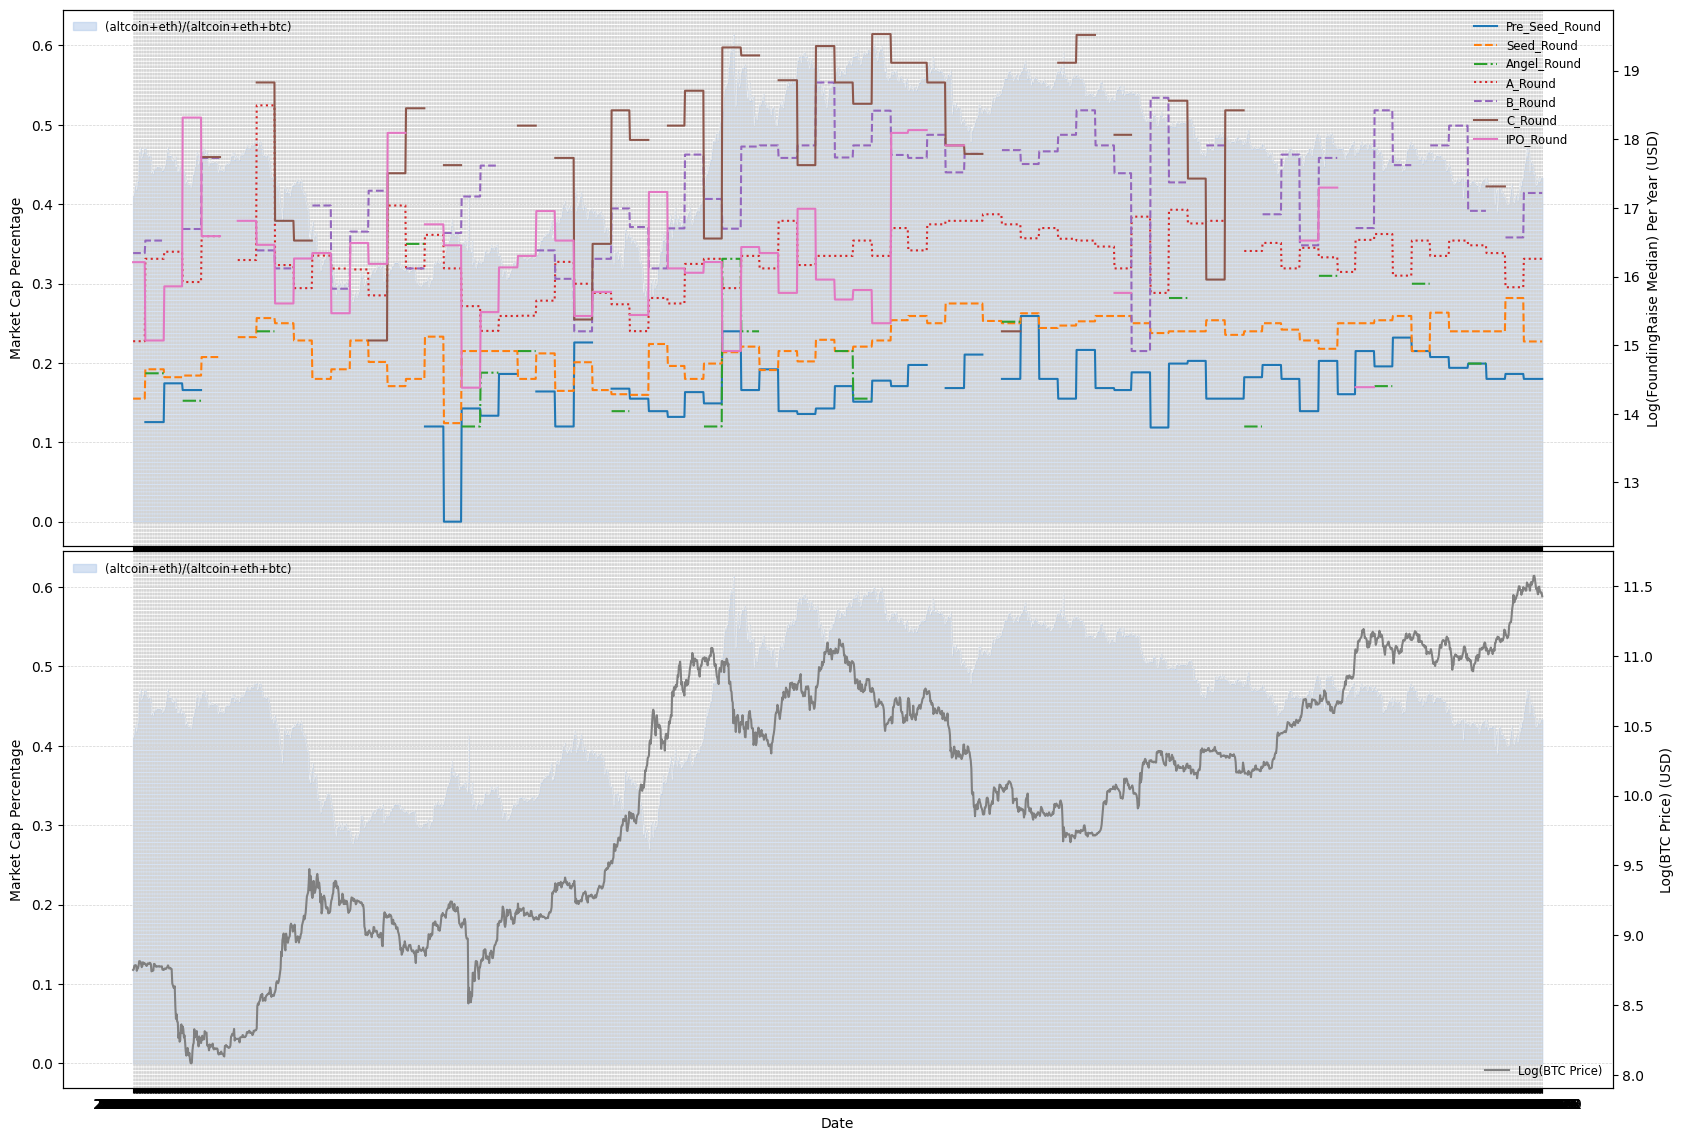

In [46]:
plotMarketcapFundingraise(marketcap_fundingraise)